In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df['age'] = 2024 - df['Year_Birth']
df = df.dropna()

<Axes: xlabel='age', ylabel='MntSweetProducts'>

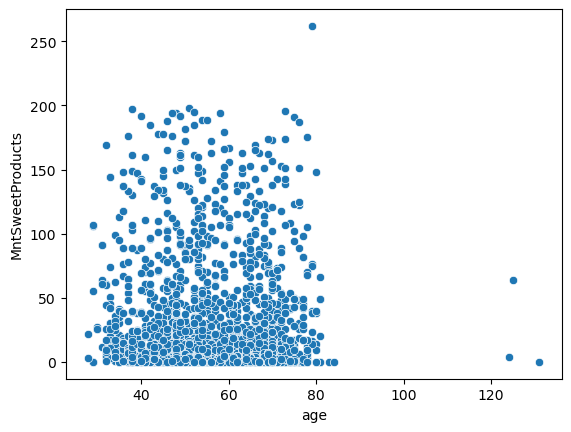

In [17]:
sns.scatterplot(data=df, x='age', y='MntSweetProducts')

C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

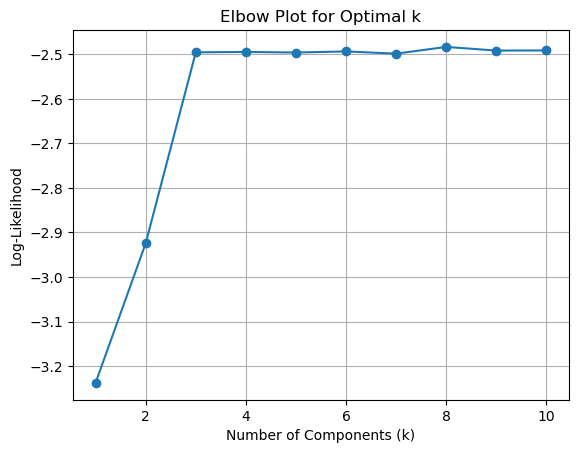

In [37]:
X, _ = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

k_values = range(1, 11)
log_likelihoods = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    log_likelihoods.append(gmm.score(X))

plt.plot(k_values, log_likelihoods, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Log-Likelihood')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()

In [38]:
X = df[['age','MntSweetProducts']]

k = 3
gmm = GaussianMixture(n_components=k)
gmm.fit(X)
print("Converged:", gmm.converged_)
predictions = gmm.predict(X)

Converged: True


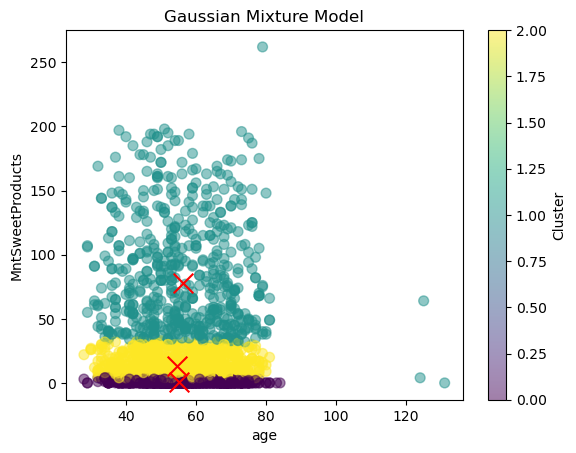

In [39]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predictions, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='Cluster')

for i in range(gmm.n_components):
    plt.scatter(gmm.means_[i, 0], gmm.means_[i, 1], c='red', s=200, marker='x')

plt.title('Gaussian Mixture Model')
plt.xlabel('age')
plt.ylabel('MntSweetProducts')
plt.show()